<a href="https://colab.research.google.com/github/Gabriel-Brenner/DataPUCPR1/blob/main/Exercise_L12_Data_drift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
pip install uci-dataset

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
# Fetch dataset => https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
real_estate_valuation = fetch_ucirepo(id=477)

# Fetch dataset =>https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
concrete_compressive_strength = fetch_ucirepo(id=165)

In [5]:
import numpy as np
from scipy.stats import ks_2samp
from scipy.stats import wasserstein_distance
from scipy.stats import entropy
from scipy.spatial import distance
from ucimlrepo import fetch_ucirepo

# Fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=477)

# Function to compute KL Divergence
def kl_divergence(p, q):
    return entropy(p, q)

# Function to compute Jensen-Shannon Divergence
def jensen_shannon_divergence(p, q):
    return distance.jensenshannon(p, q)

# Function to compute Kolmogorov-Smirnov statistic
def kolmogorov_smirnov_statistic(x, y):
    return ks_2samp(x, y).statistic

# Function to compute Wasserstein Distance
def wasserstein_distance_metric(x, y):
    return wasserstein_distance(x, y)

# Assuming you already have the dataset loaded
# Here we generate two random instances as an example
# Replace this with your actual data
old_data = np.random.rand(100)
new_data = np.random.rand(100)

# Compute divergence metrics
kl_div = kl_divergence(old_data, new_data)
js_div = jensen_shannon_divergence(old_data, new_data)
ks_stat = kolmogorov_smirnov_statistic(old_data, new_data)
wd = wasserstein_distance_metric(old_data, new_data)

# Print the results
print("KL Divergence:", kl_div)
print("Jensen-Shannon Divergence:", js_div)
print("Kolmogorov-Smirnov statistic:", ks_stat)
print("Wasserstein Distance:", wd)


KL Divergence: 0.37863791275173486
Jensen-Shannon Divergence: 0.28844118932843016
Kolmogorov-Smirnov statistic: 0.07
Wasserstein Distance: 0.028153488202334015


In [6]:
import numpy as np
from scipy.stats import ks_2samp
from scipy.stats import wasserstein_distance
from scipy.stats import entropy
from scipy.spatial import distance
from ucimlrepo import fetch_ucirepo

# Fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# Function to compute KL Divergence
def kl_divergence(p, q):
    return entropy(p, q)

# Function to compute Jensen-Shannon Divergence
def jensen_shannon_divergence(p, q):
    return distance.jensenshannon(p, q)

# Function to compute Kolmogorov-Smirnov statistic
def kolmogorov_smirnov_statistic(x, y):
    return ks_2samp(x, y).statistic

# Function to compute Wasserstein Distance
def wasserstein_distance_metric(x, y):
    return wasserstein_distance(x, y)

# Assuming you already have the dataset loaded
# Here we generate two random instances as an example
# Replace this with your actual data
old_data = np.random.rand(100)
new_data = np.random.rand(100)

# Compute divergence metrics
kl_div = kl_divergence(old_data, new_data)
js_div = jensen_shannon_divergence(old_data, new_data)
ks_stat = kolmogorov_smirnov_statistic(old_data, new_data)
wd = wasserstein_distance_metric(old_data, new_data)

# Print the results
print("KL Divergence:", kl_div)
print("Jensen-Shannon Divergence:", js_div)
print("Kolmogorov-Smirnov statistic:", ks_stat)
print("Wasserstein Distance:", wd)


KL Divergence: 0.5132910783218357
Jensen-Shannon Divergence: 0.3216342870379685
Kolmogorov-Smirnov statistic: 0.17
Wasserstein Distance: 0.056812417749268616


In [7]:
!pip install menelaus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.4/870.4 kB 10.2 MB/s eta 0:00:00


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from menelaus.change_detection import ADWIN, CUSUM, PageHinkley
from menelaus.datasets import fetch_circle_data, fetch_rainfall_data

## Import Data ##

# read in Circle dataset
df = fetch_circle_data()
drift_start, drift_end = 1000, 1250

rainfall_df = real_estate_valuation

In [ ]:
display(df)

,var1,var2,y
0,0.350395,0.095046,0.0
1,0.473468,0.583694,1.0
2,0.115968,0.078085,0.0
3,0.447701,0.313451,1.0
4,0.192150,0.471360,0.0
...,...,...,...
1995,0.700550,0.144156,1.0
1996,0.346700,0.991569,0.0
1997,0.301784,0.091977,1.0
1998,0.852435,0.871996,0.0


In [9]:
## Setup ##
cusum = CUSUM(
    target=np.mean(df.loc[:drift_start, "var2"]),  # mean / std of 'Var 2' pre-drift
    sd_hat=np.std(df.loc[:drift_start, "var2"]),
    burn_in=50,
    delta=0.005,
    threshold=40,
    direction=None,
)

# setup DF to record results
status = pd.DataFrame(columns=["index", "actual value", "drift_detected"])

# iterate through data; feed each sample to the detector, in turn
for i in range(len(df)):
    obs = df["var2"][i]
    cusum.update(obs)
    status.loc[i] = [i, obs, cusum.drift_state]

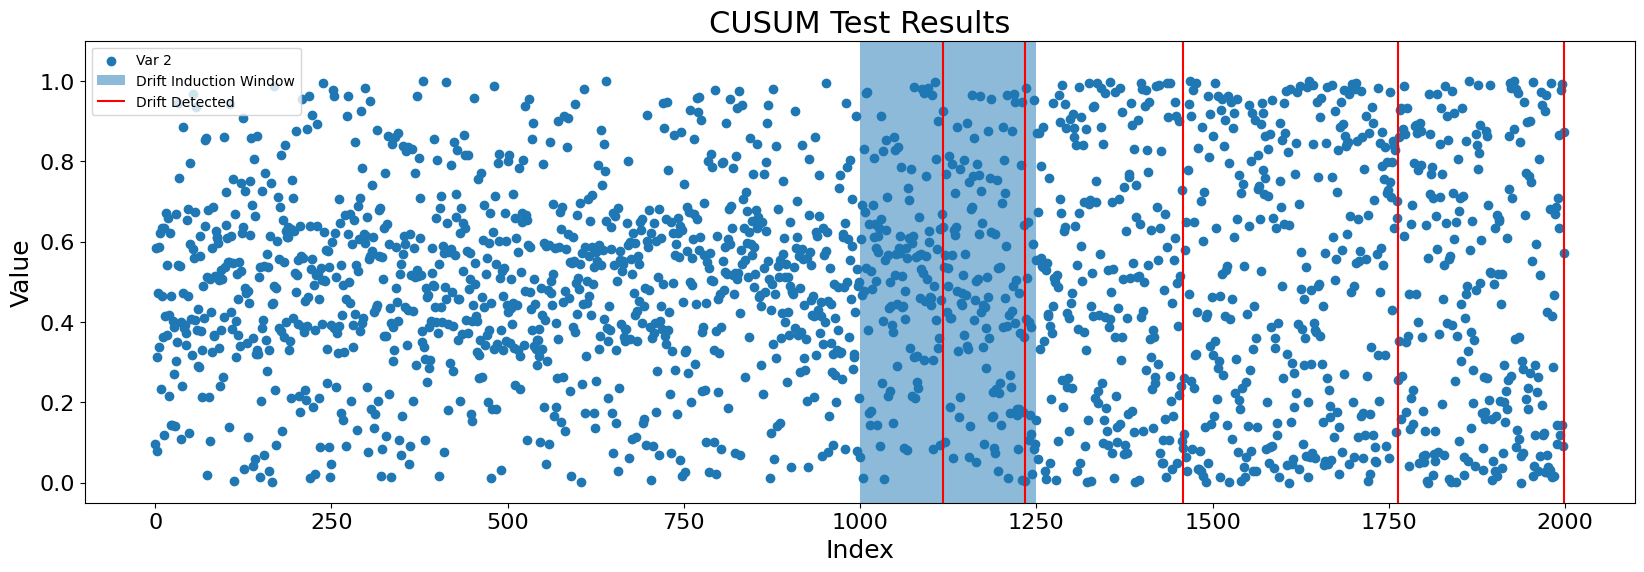

In [10]:
## Plotting ##

# plot the monitored variable and the status of the detector
plt.figure(figsize=(20, 6))
plt.scatter("index", "actual value", data=status, label="Var 2")
plt.grid(False, axis="x")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("CUSUM Test Results", fontsize=22)
plt.ylabel("Value", fontsize=18)
plt.xlabel("Index", fontsize=18)
ylims = [-0.05, 1.1]
plt.ylim(ylims)

plt.axvspan(drift_start, drift_end, alpha=0.5, label="Drift Induction Window")

plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)
plt.legend()